In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE

import seaborn as sns 
plt.rcParams["figure.figsize"] = [16,9]
sns.set_style('whitegrid')

In [11]:
df=pd.read_csv("/home/pravn/Dropbox/Masters/galah-test-nut/best_emission_candidates_spectra_labels.csv")

In [12]:
df.head()

sobject_id      1475      1476      1477      1478      1479  \
0  131116000501262  0.791232  0.799116  0.798513  0.789936  0.770570   
1  131116001001379  1.016790  1.033717  1.039141  1.053989  1.071330   
2  131118002401234  1.068419  1.064418  1.059543  1.045539  1.045996   
3  131118002401396  0.854523  0.876311  0.909512  0.926363  0.935885   
4  131118002901052  0.958085  0.961354  0.958334  0.960897  0.960540   

       1480      1481      1482      1483  ...      1541      1542      1543  \
0  0.747840  0.750200  0.778579  0.805557  ...  0.787328  0.786379  0.795869   
1  1.068635  1.053506  1.034933  1.029725  ...  1.066814  1.051114  1.045202   
2  1.074062  1.101389  1.097221  1.074829  ...  0.948488  0.951768  0.963281   
3  0.954685  0.921646  0.926053  0.934858  ...  0.952184  0.955382  0.951590   
4  0.954966  0.951380  0.939908  0.923267  ...  0.925107  0.934469  0.943445   

       1544      1545      1546      1547      1548      1549  label  
0  0.800229  0.788336  0.781923  0.799863  0.835885  0.842837      1  
1  1.061199  1.052639  1.056661  1.036873  1.035144  1.027276      2  
2  0.994941  1.033656  1.060059  1.077753  1.082559  1.075347      4  
3  0.953749  0.961062  0.973229  0.988212  0.976314  0.969340      2  
4  0.949600  0.948857  0.944906  0.948702  0.955197  0.953001      2  

[5 rows x 77 columns]

In [13]:
first_column = df.pop("label")


In [14]:
df.insert(0, "label", first_column)

In [15]:
df.head()

label       sobject_id      1475      1476      1477      1478      1479  \
0      1  131116000501262  0.791232  0.799116  0.798513  0.789936  0.770570   
1      2  131116001001379  1.016790  1.033717  1.039141  1.053989  1.071330   
2      4  131118002401234  1.068419  1.064418  1.059543  1.045539  1.045996   
3      2  131118002401396  0.854523  0.876311  0.909512  0.926363  0.935885   
4      2  131118002901052  0.958085  0.961354  0.958334  0.960897  0.960540   

       1480      1481      1482  ...      1540      1541      1542      1543  \
0  0.747840  0.750200  0.778579  ...  0.798908  0.787328  0.786379  0.795869   
1  1.068635  1.053506  1.034933  ...  1.059578  1.066814  1.051114  1.045202   
2  1.074062  1.101389  1.097221  ...  0.956748  0.948488  0.951768  0.963281   
3  0.954685  0.921646  0.926053  ...  0.945860  0.952184  0.955382  0.951590   
4  0.954966  0.951380  0.939908  ...  0.920758  0.925107  0.934469  0.943445   

       1544      1545      1546      1547      1548      1549  
0  0.800229  0.788336  0.781923  0.799863  0.835885  0.842837  
1  1.061199  1.052639  1.056661  1.036873  1.035144  1.027276  
2  0.994941  1.033656  1.060059  1.077753  1.082559  1.075347  
3  0.953749  0.961062  0.973229  0.988212  0.976314  0.969340  
4  0.949600  0.948857  0.944906  0.948702  0.955197  0.953001  

[5 rows x 77 columns]

In [8]:
df_data = df.iloc[:,2:]

In [9]:
df_data.head()

1475      1476      1477      1478      1479      1480      1481  \
0  0.791232  0.799116  0.798513  0.789936  0.770570  0.747840  0.750200   
1  1.016790  1.033717  1.039141  1.053989  1.071330  1.068635  1.053506   
2  1.068419  1.064418  1.059543  1.045539  1.045996  1.074062  1.101389   
3  0.854523  0.876311  0.909512  0.926363  0.935885  0.954685  0.921646   
4  0.958085  0.961354  0.958334  0.960897  0.960540  0.954966  0.951380   

       1482      1483      1484  ...      1540      1541      1542      1543  \
0  0.778579  0.805557  0.818449  ...  0.798908  0.787328  0.786379  0.795869   
1  1.034933  1.029725  1.013231  ...  1.059578  1.066814  1.051114  1.045202   
2  1.097221  1.074829  1.057252  ...  0.956748  0.948488  0.951768  0.963281   
3  0.926053  0.934858  0.936088  ...  0.945860  0.952184  0.955382  0.951590   
4  0.939908  0.923267  0.903025  ...  0.920758  0.925107  0.934469  0.943445   

       1544      1545      1546      1547      1548      1549  
0  0.800229  0.788336  0.781923  0.799863  0.835885  0.842837  
1  1.061199  1.052639  1.056661  1.036873  1.035144  1.027276  
2  0.994941  1.033656  1.060059  1.077753  1.082559  1.075347  
3  0.953749  0.961062  0.973229  0.988212  0.976314  0.969340  
4  0.949600  0.948857  0.944906  0.948702  0.955197  0.953001  

[5 rows x 75 columns]

In [10]:
df_data.to_csv("best_emission_candidates_spectra_data.csv")

In [3]:
df2 = pd.read_csv("best_emission_candidates_spectra_data.csv",index_col=0)

In [4]:
df2.head()

1475      1476      1477      1478      1479      1480      1481  \
0  0.791232  0.799116  0.798513  0.789936  0.770570  0.747840  0.750200   
1  1.016790  1.033717  1.039141  1.053989  1.071330  1.068635  1.053506   
2  1.068419  1.064418  1.059543  1.045539  1.045996  1.074062  1.101389   
3  0.854523  0.876311  0.909512  0.926363  0.935885  0.954685  0.921646   
4  0.958085  0.961354  0.958334  0.960897  0.960540  0.954966  0.951380   

       1482      1483      1484  ...      1540      1541      1542      1543  \
0  0.778579  0.805557  0.818449  ...  0.798908  0.787328  0.786379  0.795869   
1  1.034933  1.029725  1.013231  ...  1.059578  1.066814  1.051114  1.045202   
2  1.097221  1.074829  1.057252  ...  0.956748  0.948488  0.951768  0.963281   
3  0.926053  0.934858  0.936088  ...  0.945860  0.952184  0.955382  0.951590   
4  0.939908  0.923267  0.903025  ...  0.920758  0.925107  0.934469  0.943445   

       1544      1545      1546      1547      1548      1549  
0  0.800229  0.788336  0.781923  0.799863  0.835885  0.842837  
1  1.061199  1.052639  1.056661  1.036873  1.035144  1.027276  
2  0.994941  1.033656  1.060059  1.077753  1.082559  1.075347  
3  0.953749  0.961062  0.973229  0.988212  0.976314  0.969340  
4  0.949600  0.948857  0.944906  0.948702  0.955197  0.953001  

[5 rows x 75 columns]

In [5]:
df2_np = df2.to_numpy()

In [6]:
#embeddings = TSNE(n_components=2,perplexity=30).fit_transform(df2_np)
embeddings = TSNE(n_components=2,perplexity=30).fit_transform(df2_np)
vis_x = embeddings[:, 0]
vis_y = embeddings[:, 1]

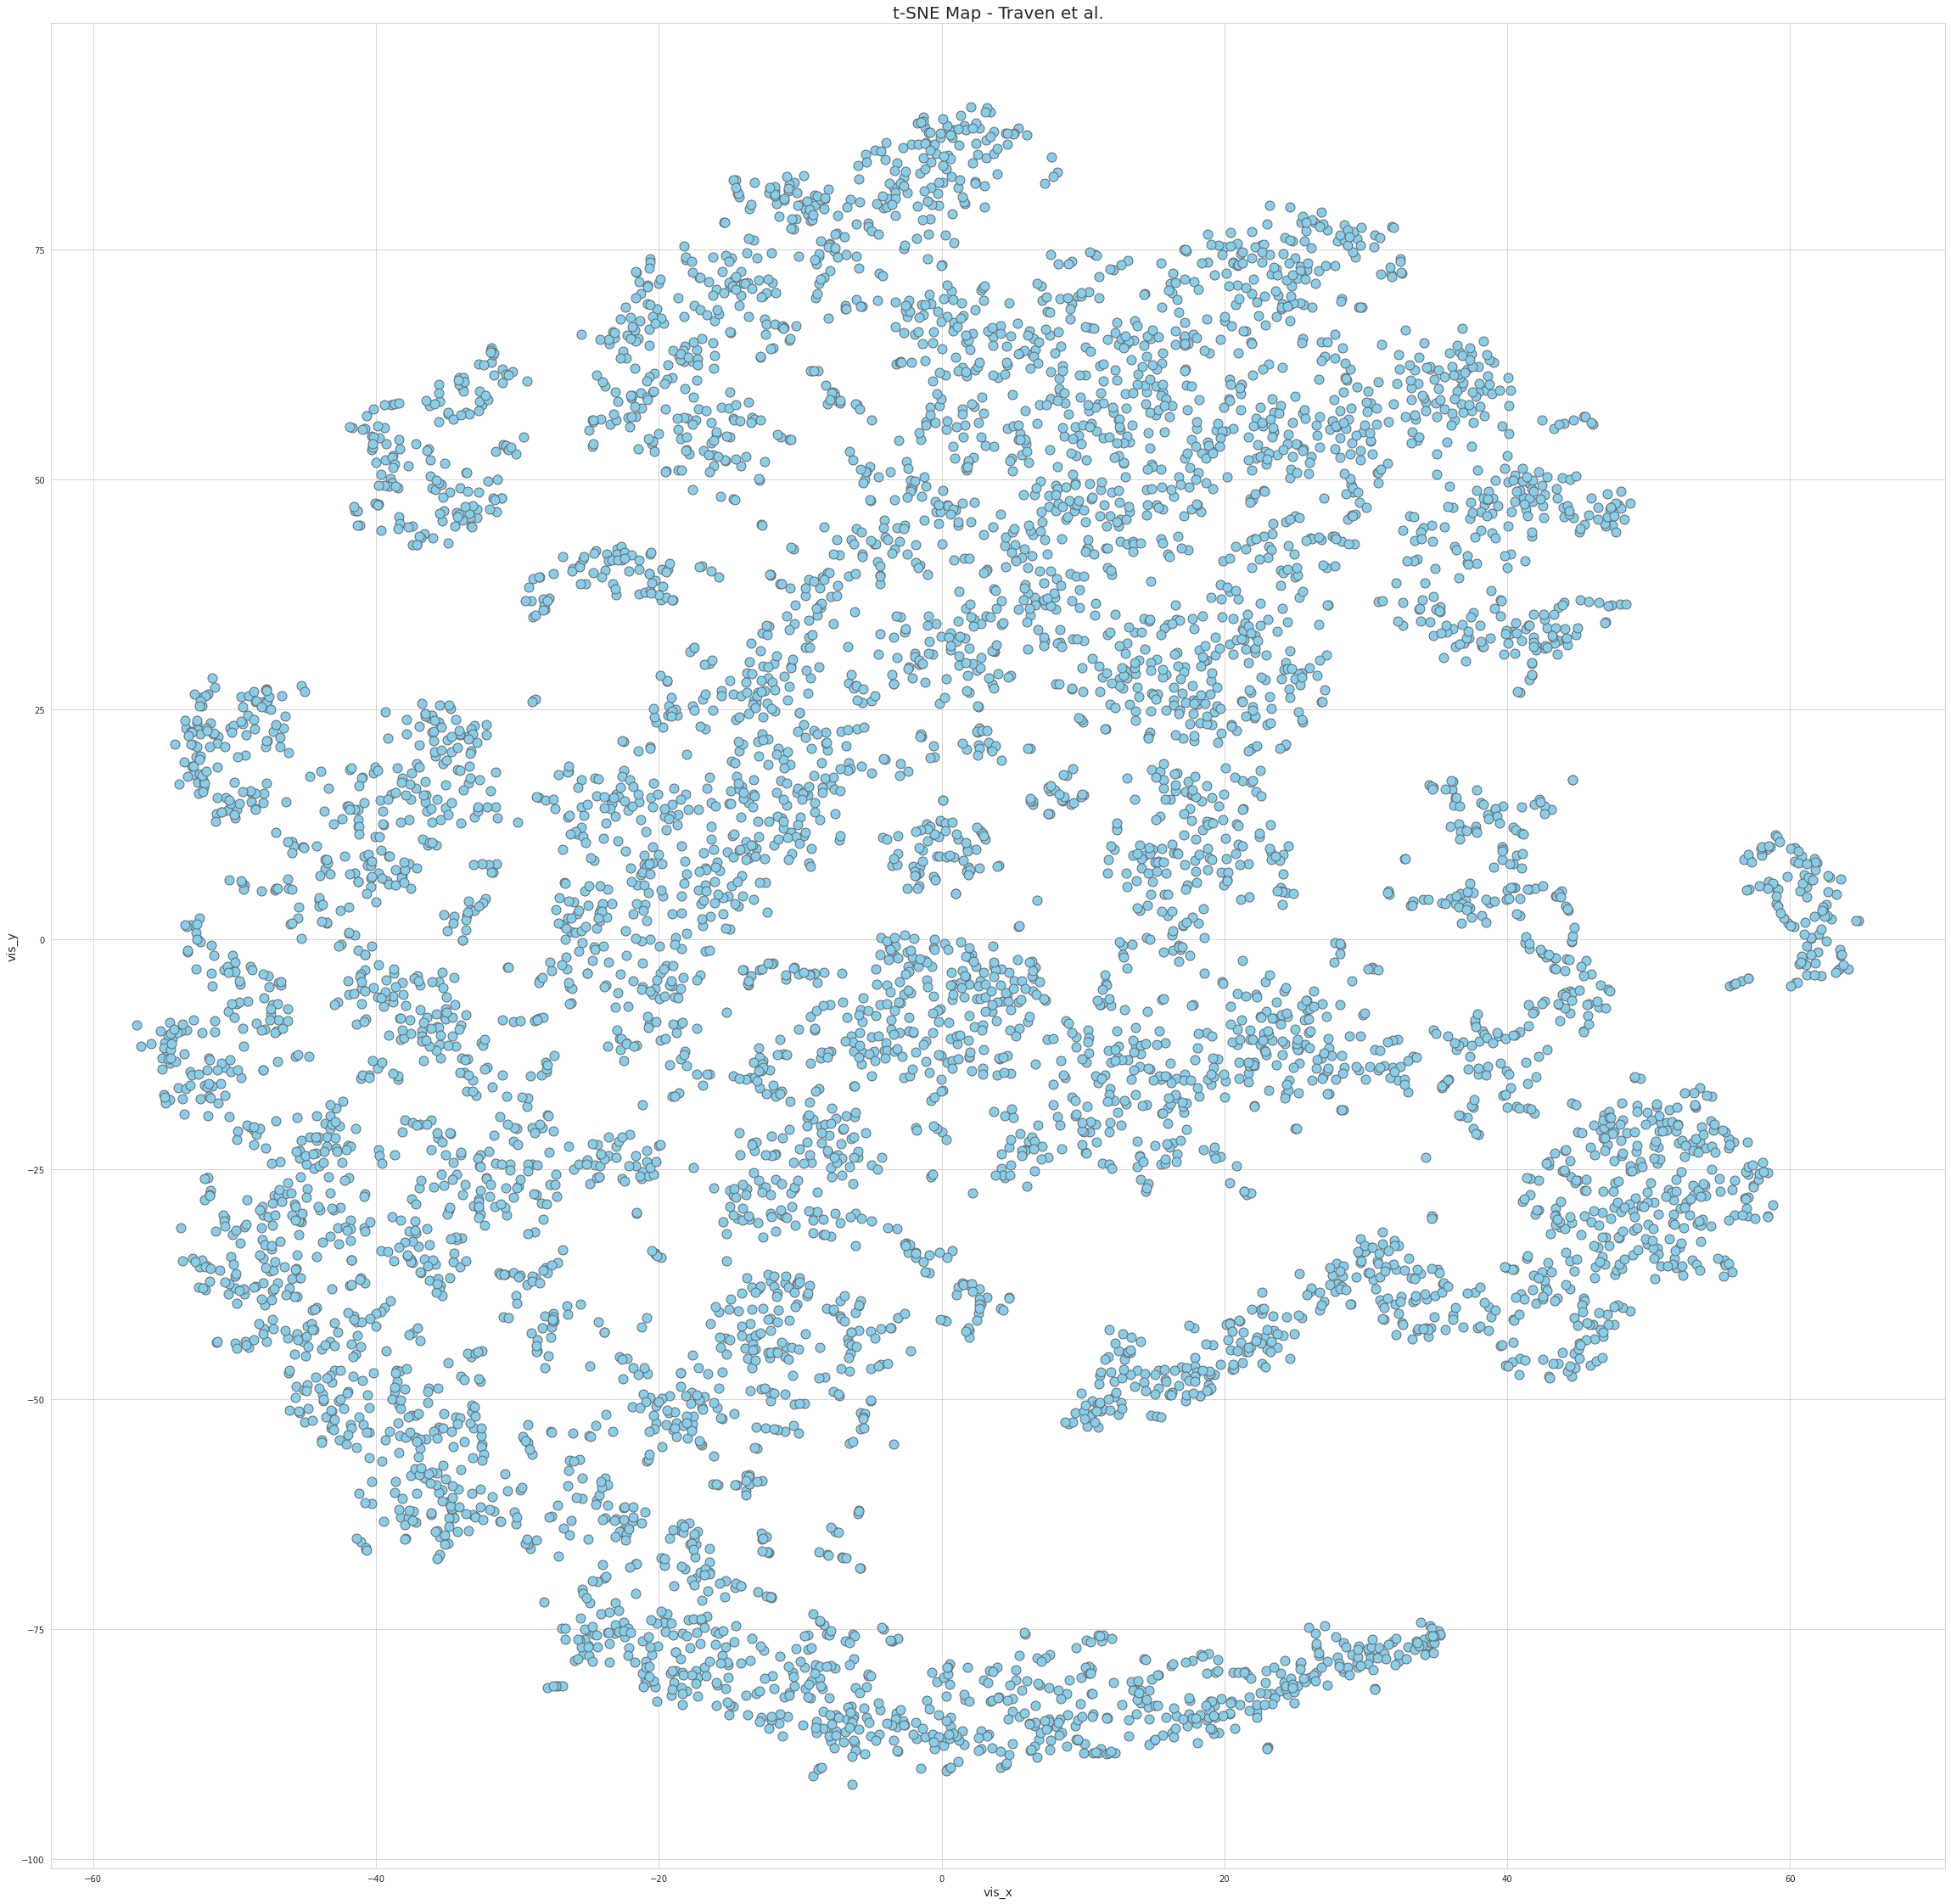

In [7]:
plt.figure(figsize=(40,40))
plt.scatter(vis_x,vis_y, color = 'skyblue', alpha = 1, edgecolors = 'dimgray', s=120)
plt.title('t-SNE Map - Traven et al.',fontsize=20)
plt.xlabel('vis_x',fontsize=14)
plt.ylabel('vis_y',fontsize=14)
plt.show()

In [8]:
embeddings_x_y = pd.DataFrame({'vis_x': vis_x, 'vis_y': vis_y}, columns=['vis_x', 'vis_y'])

In [146]:
vis_x

array([-15.226835, -25.845146, -60.633984, ..., -13.838847, -30.724478,
       -13.512304], dtype=float32)

In [147]:
vis_y

array([ 43.94561 , -66.67455 , -36.764988, ...,  27.81774 ,  35.542423,
        -8.60699 ], dtype=float32)

In [27]:
embeddings_x_y.head()

vis_x      vis_y  label label_str
0   5.443556  54.335854      1         1
1 -26.324177 -64.750252      2         2
2  10.729455 -88.439850      4         4
3 -34.006184 -23.416307      2         2
4 -40.492374 -14.771273      2         2

In [16]:
embeddings_x_y["label"]=df["label"]

In [150]:
embeddings_x_y.head()

vis_x      vis_y  label
0 -15.226835  43.945610      1
1 -25.845146 -66.674553      2
2 -60.633984 -36.764988      4
3   2.999940 -33.781445      2
4  -4.483072 -27.007170      2

In [17]:
embeddings_x_y["label"].value_counts()

1    3000
2    1848
3    1430
4     423
8     102
6      99
9      63
0       7
7       4
5       1
Name: label, dtype: int64

In [18]:
embeddings_x_y["label"].dtype

dtype('int64')

In [19]:
embeddings_x_y["label_str"] = embeddings_x_y["label"].apply(str)

In [20]:
embeddings_x_y["label_str"].dtype

dtype('O')

In [21]:
embeddings_x_y["label"].value_counts()

1    3000
2    1848
3    1430
4     423
8     102
6      99
9      63
0       7
7       4
5       1
Name: label, dtype: int64

In [22]:
embeddings_x_y["label"].dtype

dtype('int64')

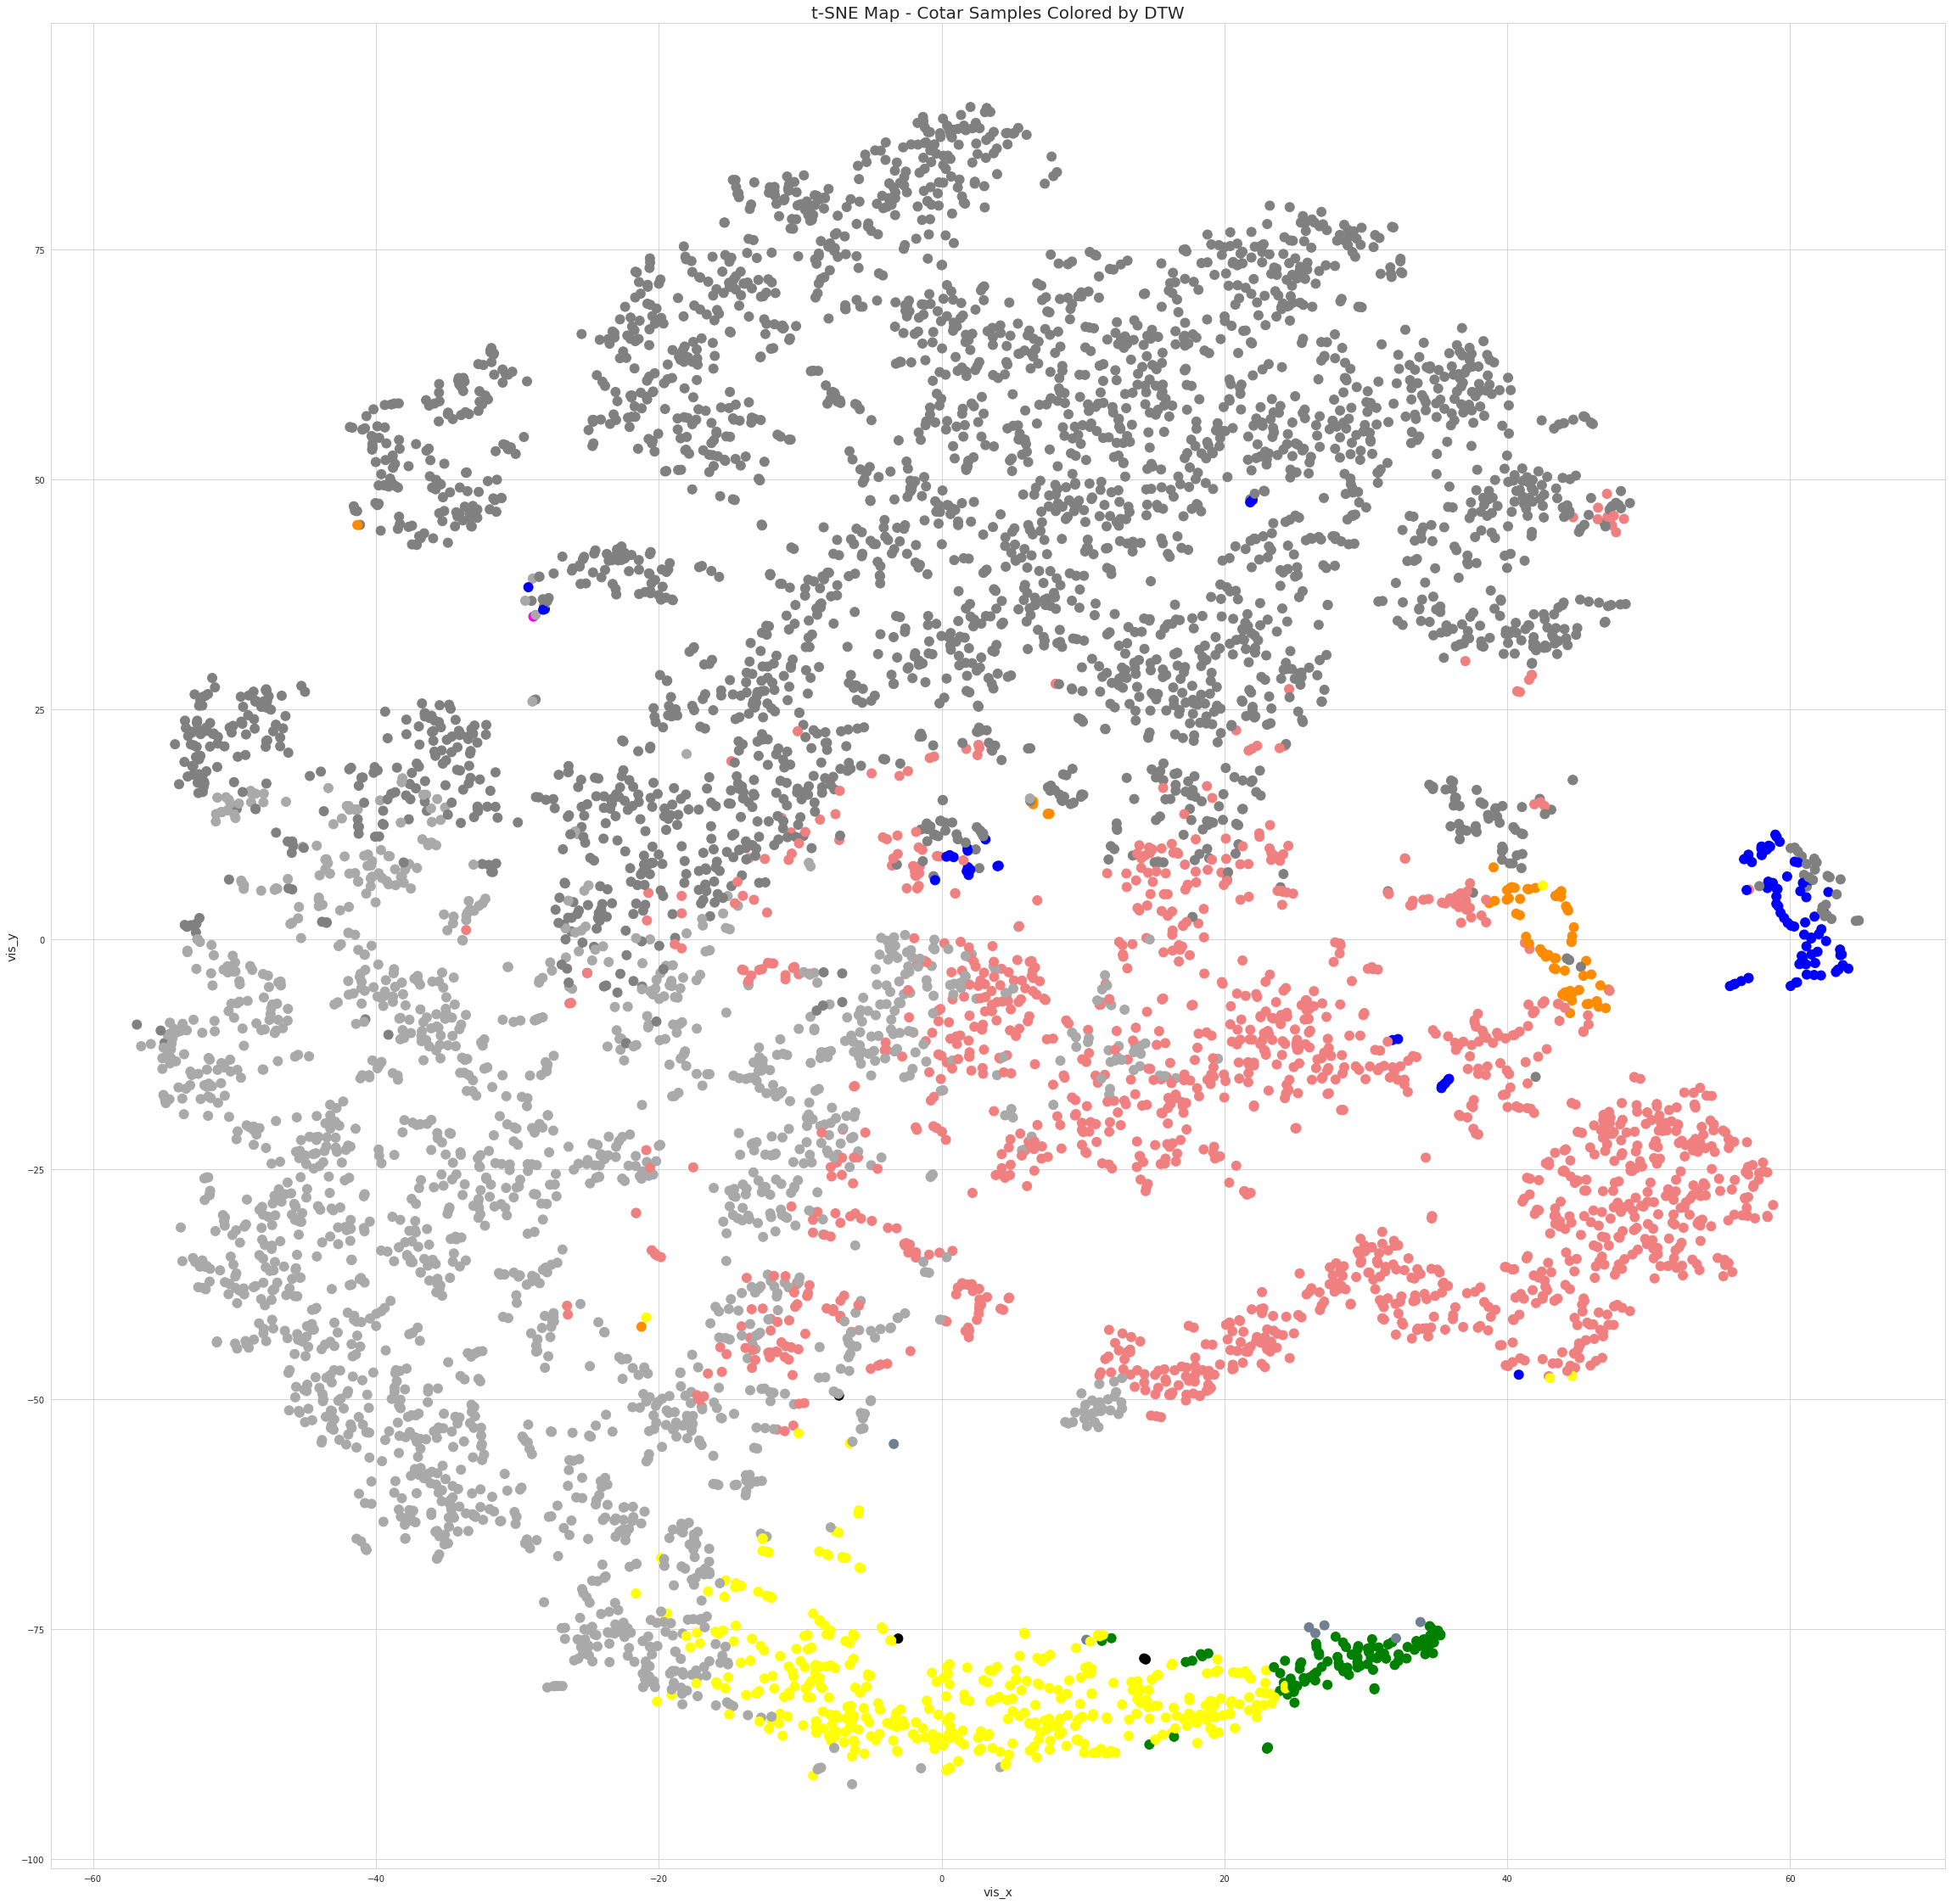

In [23]:
colors = {'9':'darkorange', '8':'blue','7':'black','6':'green','5':'fuchsia','4':'yellow','3':'lightcoral','2':'darkgray','1':'gray','0':'slategrey'}
plt.figure(figsize=(40,40))
plt.scatter(embeddings_x_y["vis_x"],embeddings_x_y["vis_y"], color = embeddings_x_y["label_str"].map(colors), alpha = 1, s=120)
plt.title('t-SNE Map - Cotar Samples Colored by DTW',fontsize=20)
plt.xlabel('vis_x',fontsize=14)
plt.ylabel('vis_y',fontsize=14)
plt.show()

/tmp/ipykernel_9456/1422068274.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


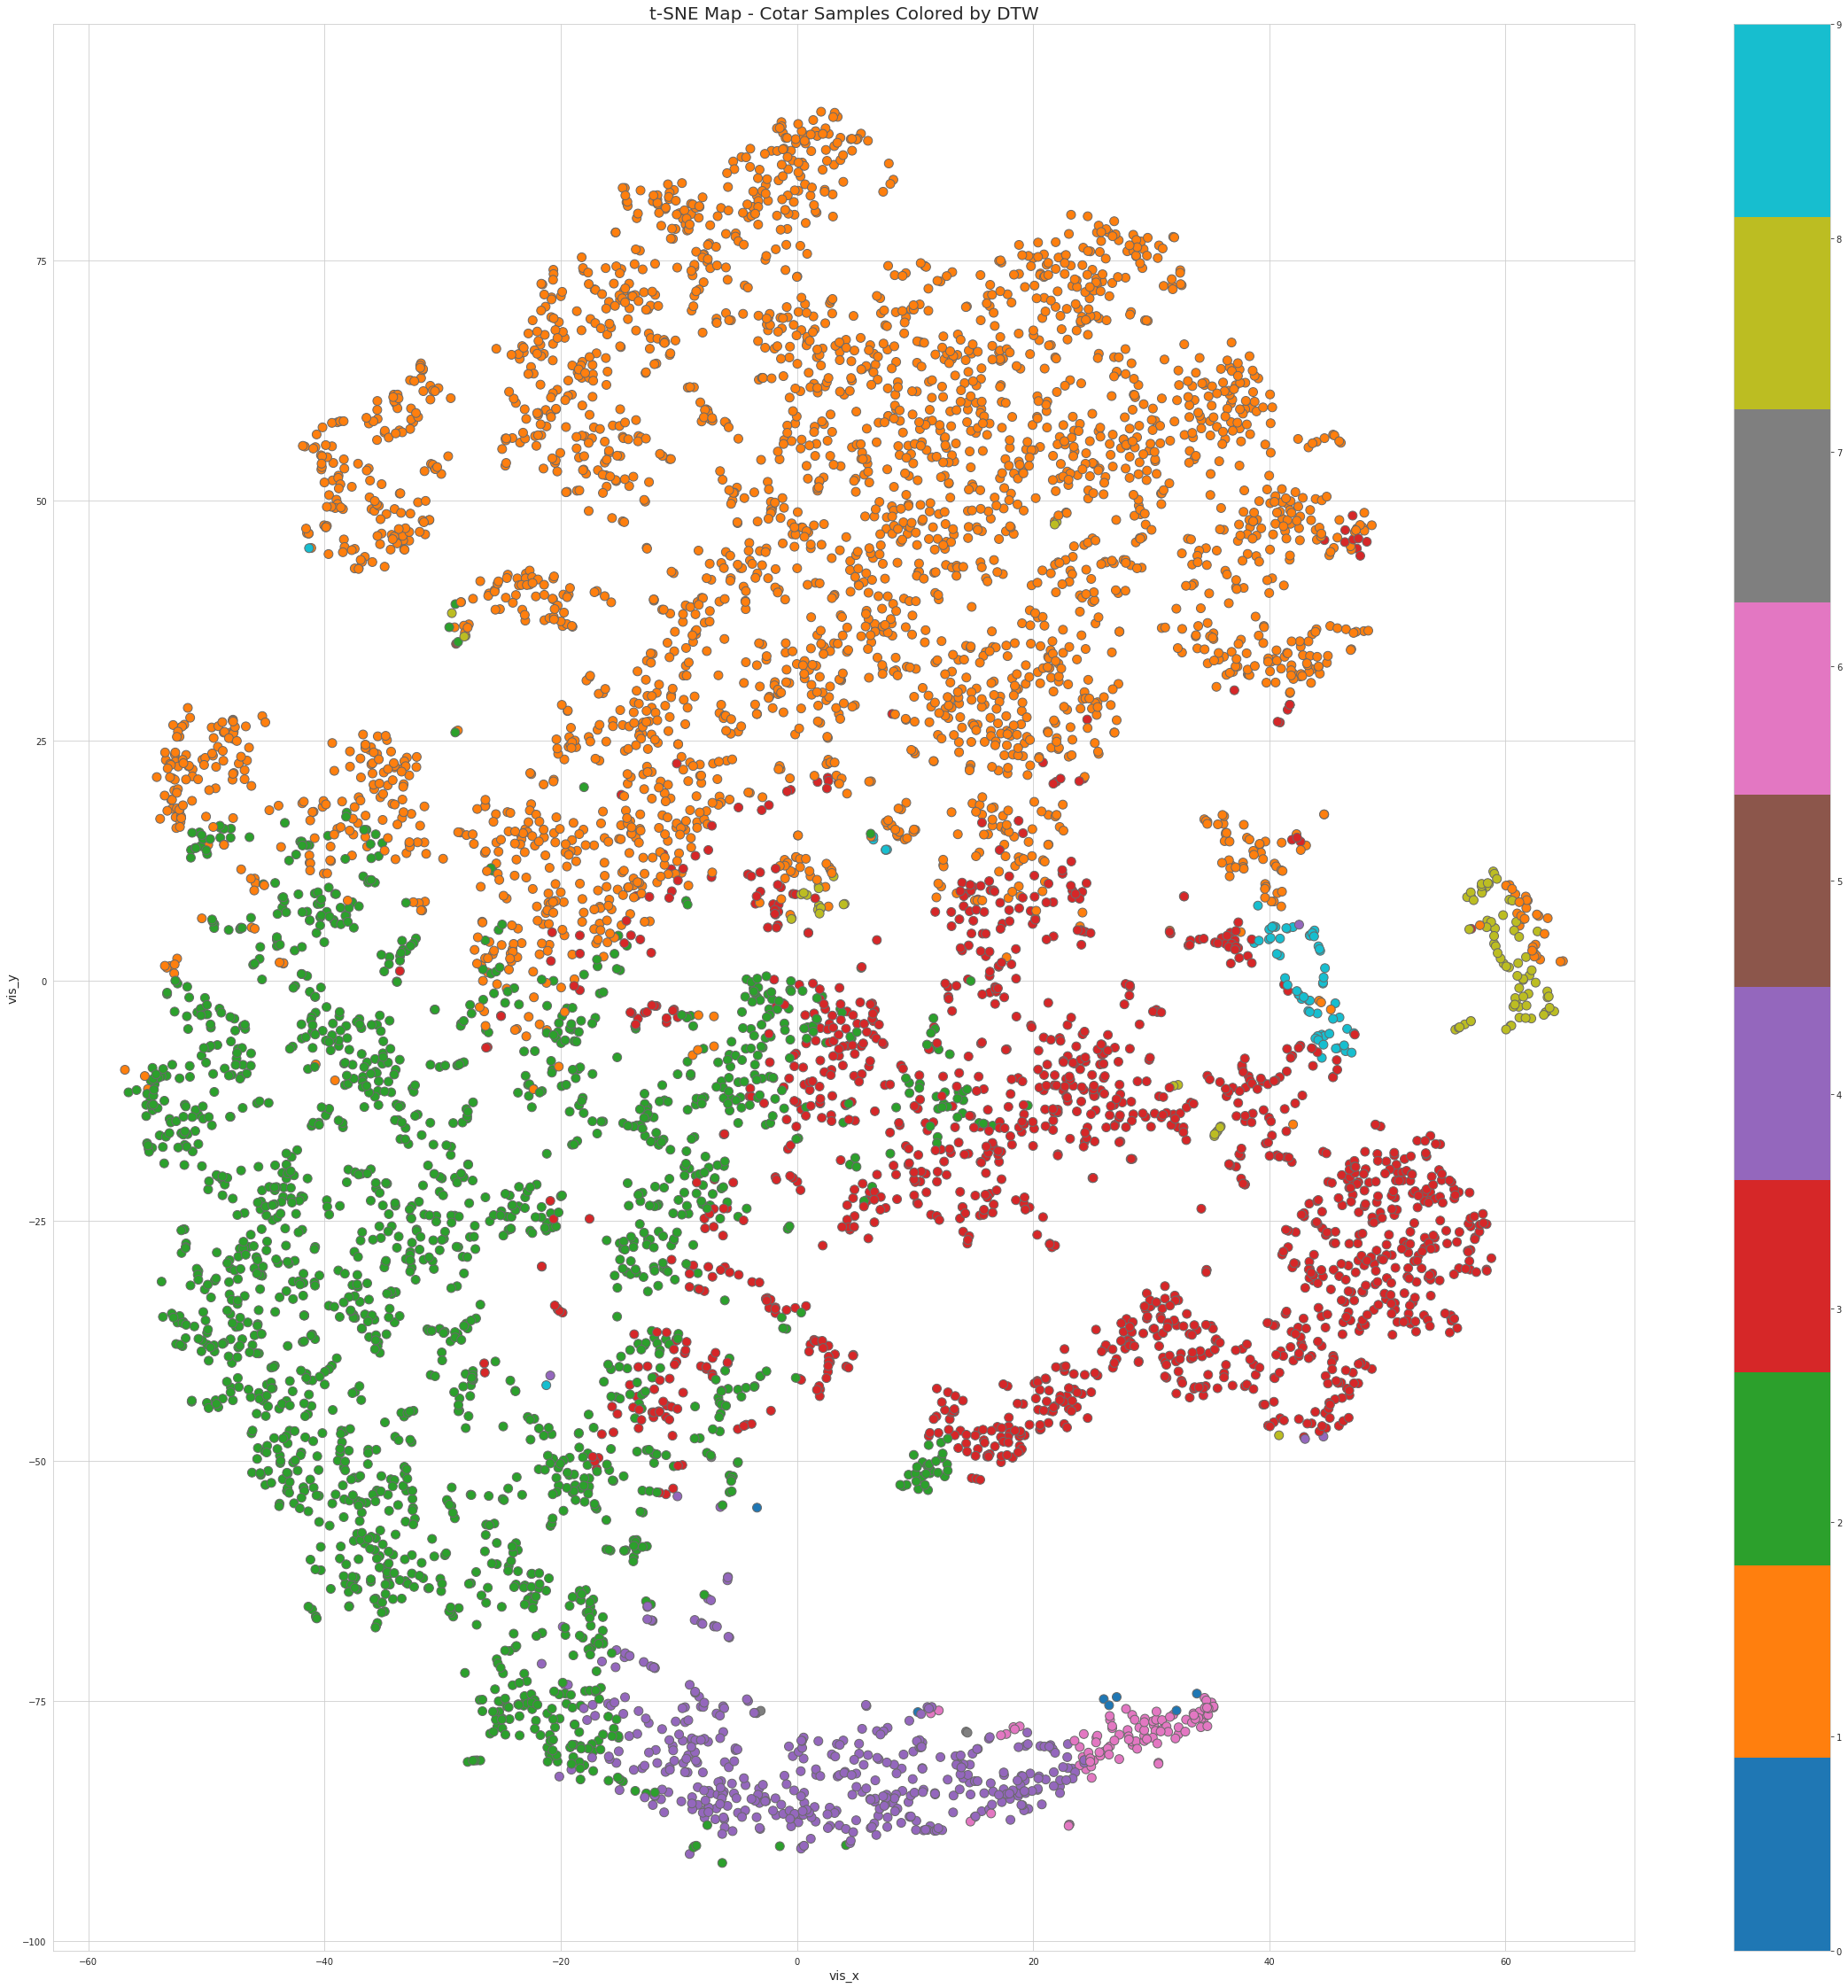

In [24]:
plt.figure(figsize=(40,40))
plt.scatter(embeddings_x_y["vis_x"],embeddings_x_y["vis_y"], c = embeddings_x_y["label"], cmap='tab10', edgecolors = 'dimgray', alpha = 1, s=100)
plt.title('t-SNE Map - Cotar Samples Colored by DTW',fontsize=20)
plt.xlabel('vis_x',fontsize=14)
plt.ylabel('vis_y',fontsize=14)
plt.colorbar()
plt.show()

In [25]:
df["vis_x"] = embeddings_x_y["vis_x"]
df["vis_y"] = embeddings_x_y["vis_y"]

In [26]:
df.head()

label       sobject_id      1475      1476      1477      1478      1479  \
0      1  131116000501262  0.791232  0.799116  0.798513  0.789936  0.770570   
1      2  131116001001379  1.016790  1.033717  1.039141  1.053989  1.071330   
2      4  131118002401234  1.068419  1.064418  1.059543  1.045539  1.045996   
3      2  131118002401396  0.854523  0.876311  0.909512  0.926363  0.935885   
4      2  131118002901052  0.958085  0.961354  0.958334  0.960897  0.960540   

       1480      1481      1482  ...      1542      1543      1544      1545  \
0  0.747840  0.750200  0.778579  ...  0.786379  0.795869  0.800229  0.788336   
1  1.068635  1.053506  1.034933  ...  1.051114  1.045202  1.061199  1.052639   
2  1.074062  1.101389  1.097221  ...  0.951768  0.963281  0.994941  1.033656   
3  0.954685  0.921646  0.926053  ...  0.955382  0.951590  0.953749  0.961062   
4  0.954966  0.951380  0.939908  ...  0.934469  0.943445  0.949600  0.948857   

       1546      1547      1548      1549      vis_x      vis_y  
0  0.781923  0.799863  0.835885  0.842837   5.443556  54.335854  
1  1.056661  1.036873  1.035144  1.027276 -26.324177 -64.750252  
2  1.060059  1.077753  1.082559  1.075347  10.729455 -88.439850  
3  0.973229  0.988212  0.976314  0.969340 -34.006184 -23.416307  
4  0.944906  0.948702  0.955197  0.953001 -40.492374 -14.771273  

[5 rows x 79 columns]

In [28]:
df.to_csv("best_emission_candidates_spectra_data_tsne_perp30.csv")

In [29]:
df_pcygni = df[df["label"]==8]

In [30]:
df_pcygni.head()

label       sobject_id      1475      1476      1477      1478      1479  \
97       8  140117002101365  0.794604  0.776347  0.776930  0.791981  0.790453   
98       8  140117002101372  0.902212  0.896195  0.883801  0.877552  0.870524   
127      8  140414005101276  0.840448  0.872358  0.844133  0.804374  0.792437   
130      8  140414005101301  0.892910  0.883916  0.898006  0.936324  0.947625   
362      8  140808001101021  0.955558  0.969204  0.991106  1.003321  0.995302   

         1480      1481      1482  ...      1542      1543      1544  \
97   0.794668  0.809689  0.775877  ...  0.853442  0.839655  0.833818   
98   0.855226  0.868233  0.851364  ...  1.450809  1.448255  1.384193   
127  0.768394  0.779685  0.807528  ...  0.844608  0.835611  0.826211   
130  0.969531  0.986549  0.974287  ...  1.054103  1.059027  1.045938   
362  0.990477  0.996383  0.998356  ...  0.986331  1.013787  1.035562   

         1545      1546      1547      1548      1549      vis_x      vis_y  
97   0.845164  0.823923  0.809429  0.824852  0.843350  62.037296   0.557338  
98   1.316939  1.259324  1.195910  1.128387  1.081750  35.886177 -15.166467  
127  0.850751  0.865610  0.883266  0.889980  0.888322  57.102058   8.712856  
130  1.019266  0.981117  0.925452  0.881020  0.855598  61.135410  -2.716018  
362  1.023330  0.993065  0.986416  0.987714  0.952534  58.966576  11.378881  

[5 rows x 79 columns]

In [31]:
df_pcygni_right = df_pcygni[df_pcygni["vis_x"]>50]

In [32]:
df_pcygni_right

label       sobject_id      1475      1476      1477      1478  \
97        8  140117002101365  0.794604  0.776347  0.776930  0.791981   
127       8  140414005101276  0.840448  0.872358  0.844133  0.804374   
130       8  140414005101301  0.892910  0.883916  0.898006  0.936324   
362       8  140808001101021  0.955558  0.969204  0.991106  1.003321   
413       8  141104005301237  0.833165  0.827541  0.839610  0.824984   
...     ...              ...       ...       ...       ...       ...   
5306      8  190224002101132  0.846798  0.814850  0.796403  0.802453   
5796      8  170411004601147  0.865180  0.860471  0.863847  0.867482   
6318      8  170509005701020  0.783829  0.778948  0.783012  0.791443   
6495      8  190210001601139  0.953721  0.959760  0.968611  0.969451   
6655      8  190210002401357  0.890439  0.901597  0.889457  0.887613   

          1479      1480      1481      1482  ...      1542      1543  \
97    0.790453  0.794668  0.809689  0.775877  ...  0.853442  0.839655   
127   0.792437  0.768394  0.779685  0.807528  ...  0.844608  0.835611   
130   0.947625  0.969531  0.986549  0.974287  ...  1.054103  1.059027   
362   0.995302  0.990477  0.996383  0.998356  ...  0.986331  1.013787   
413   0.809560  0.809566  0.811731  0.821685  ...  0.866700  0.849979   
...        ...       ...       ...       ...  ...       ...       ...   
5306  0.804180  0.783209  0.772110  0.781999  ...  0.828417  0.836698   
5796  0.855350  0.841758  0.824034  0.824489  ...  1.047475  0.989254   
6318  0.791148  0.784061  0.778115  0.773359  ...  0.870354  0.856255   
6495  0.934909  0.888577  0.878470  0.888355  ...  0.944746  0.957345   
6655  0.873712  0.841073  0.838913  0.853193  ...  0.947213  0.982755   

          1544      1545      1546      1547      1548      1549      vis_x  \
97    0.833818  0.845164  0.823923  0.809429  0.824852  0.843350  62.037296   
127   0.826211  0.850751  0.865610  0.883266  0.889980  0.888322  57.102058   
130   1.045938  1.019266  0.981117  0.925452  0.881020  0.855598  61.135410   
362   1.035562  1.023330  0.993065  0.986416  0.987714  0.952534  58.966576   
413   0.841436  0.863454  0.871877  0.862504  0.845633  0.839736  61.474506   
...        ...       ...       ...       ...       ...       ...        ...   
5306  0.830784  0.841210  0.805655  0.814919  0.870125  0.885121  62.221893   
5796  0.943858  0.922663  0.920933  0.919920  0.916050  0.909000  56.118408   
6318  0.855047  0.851083  0.837490  0.822053  0.821991  0.839792  61.706379   
6495  0.967849  0.952217  0.934478  0.956269  0.930797  0.897407  63.666809   
6655  0.963834  0.905002  0.869394  0.892998  0.936759  0.952894  61.006313   

          vis_y  
97     0.557338  
127    8.712856  
130   -2.716018  
362   11.378881  
413    6.420041  
...         ...  
5306   1.092807  
5796  -4.832019  
6318  -3.875803  
6495  -1.641353  
6655   0.513771  

[74 rows x 79 columns]

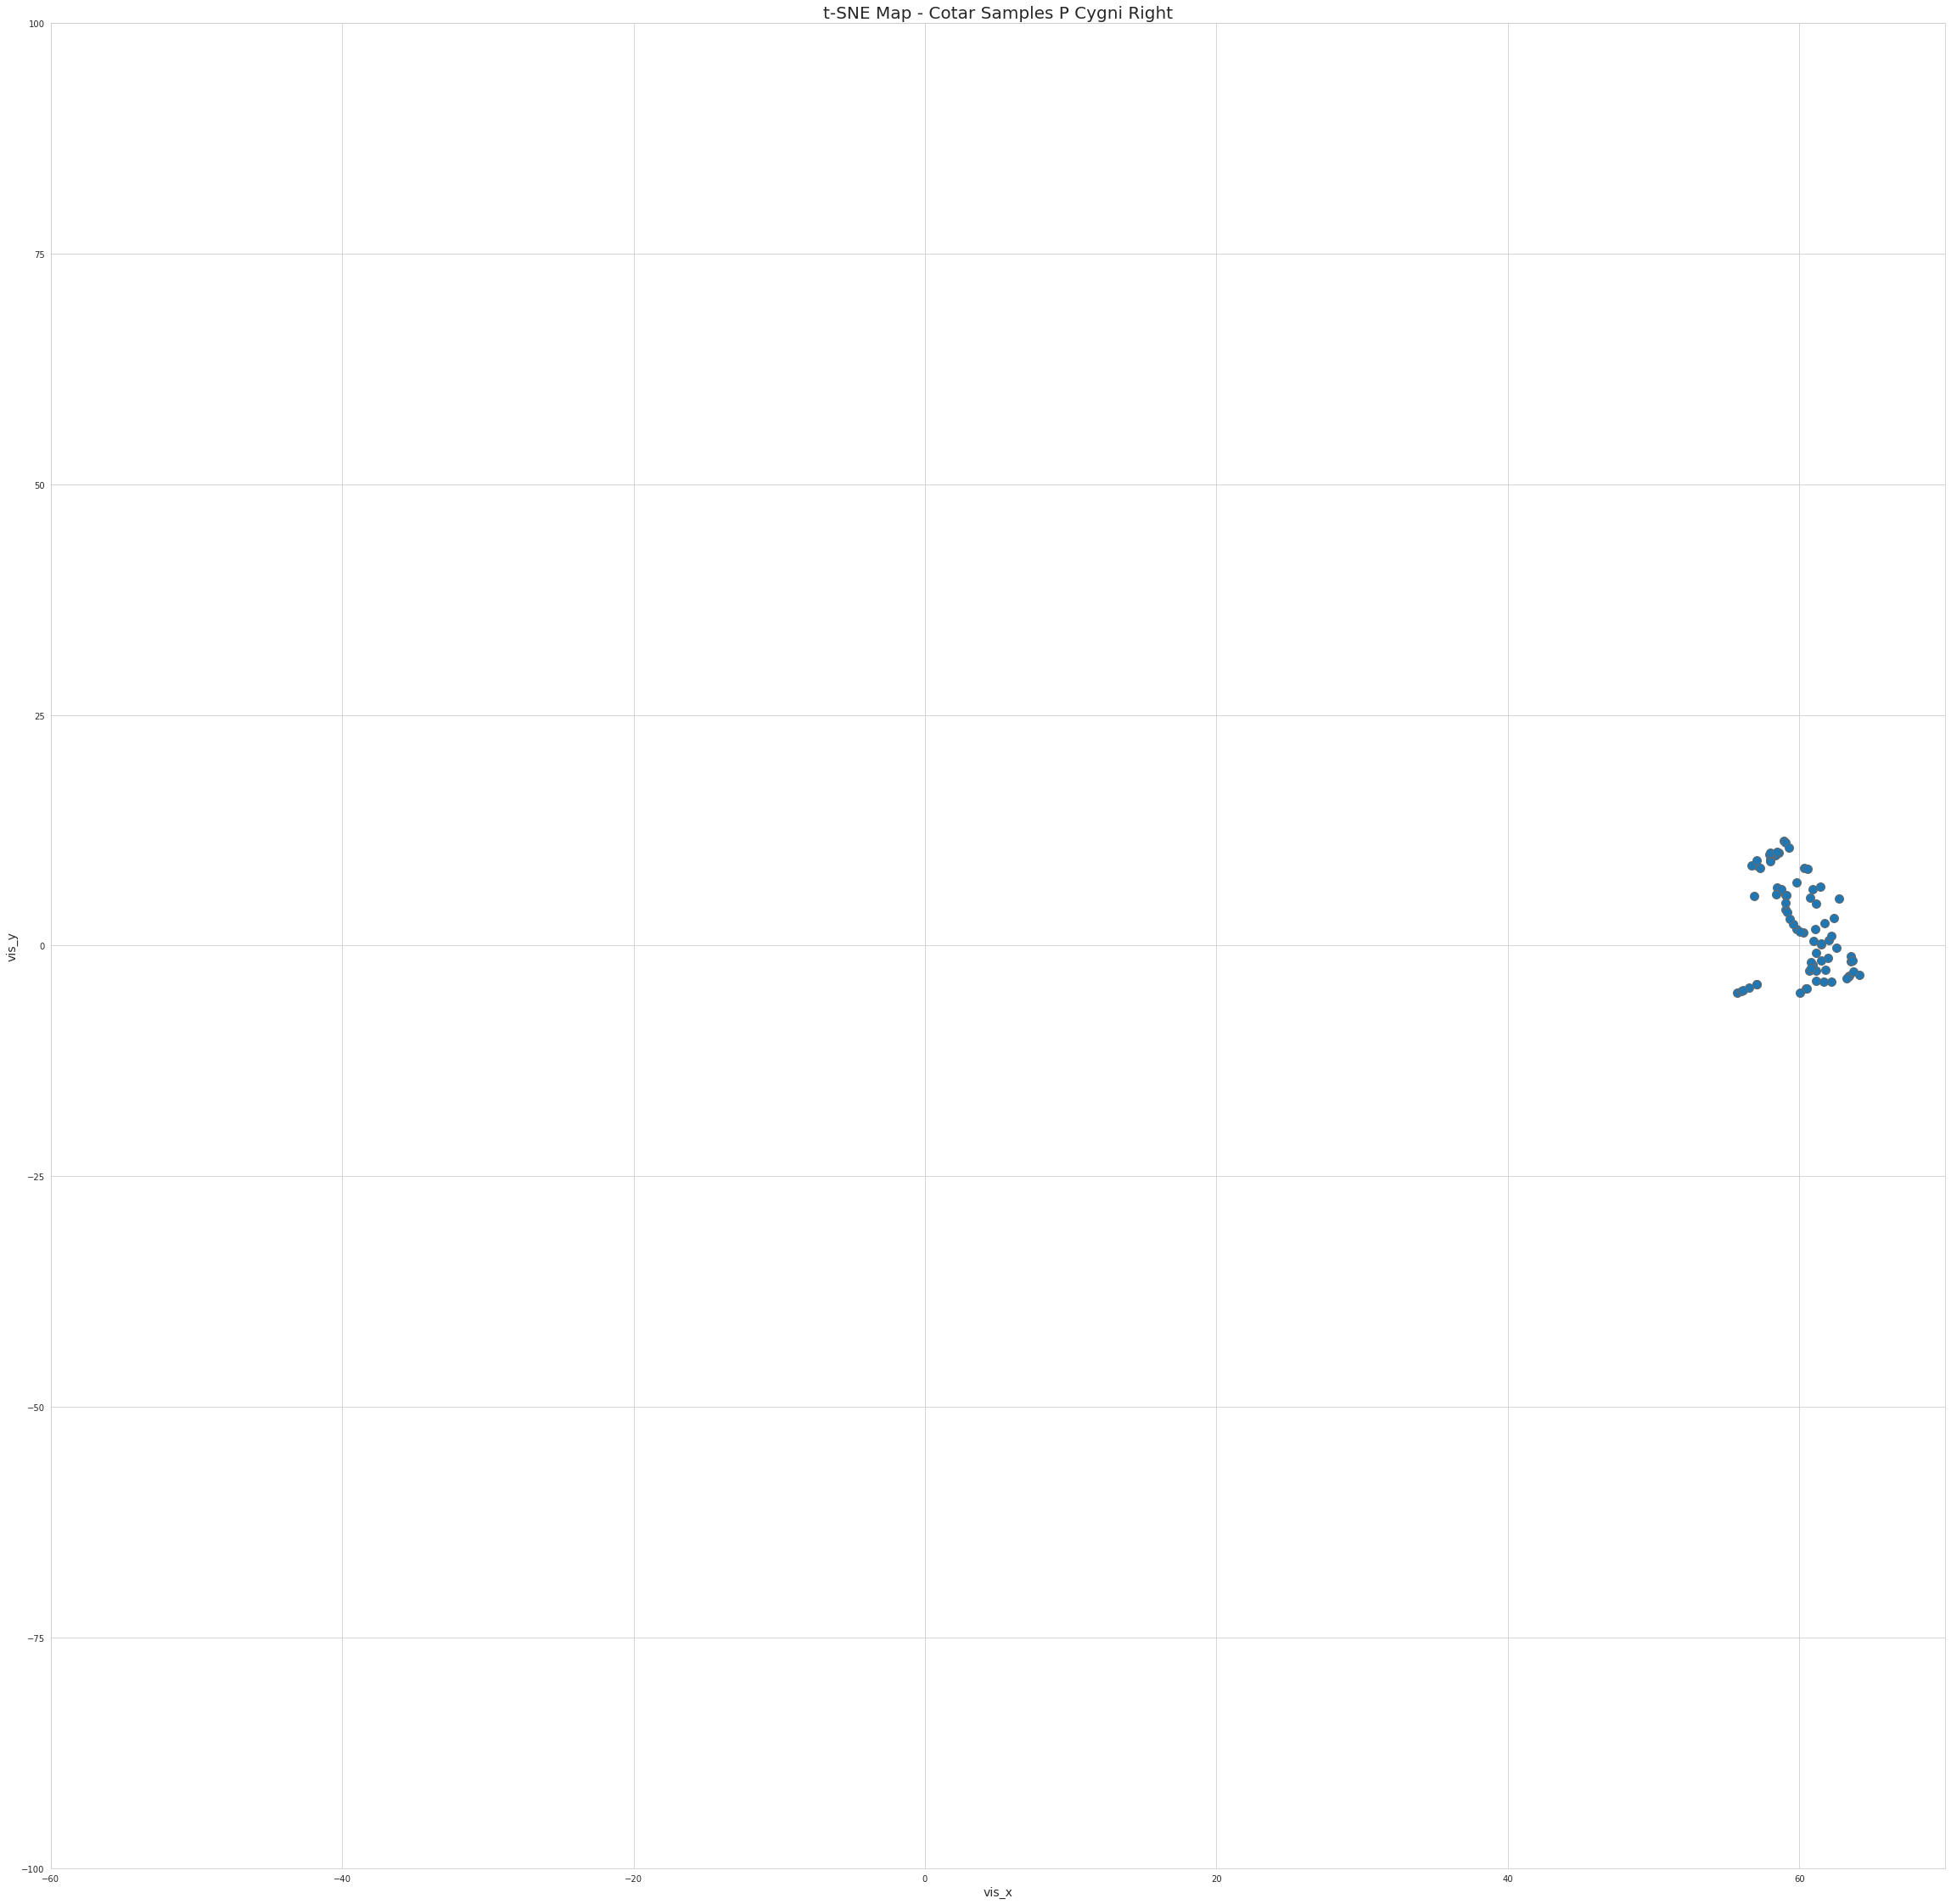

In [40]:
plt.figure(figsize=(40,40))
plt.scatter(df_pcygni_right["vis_x"],df_pcygni_right["vis_y"], edgecolors = 'dimgray', alpha = 1, s=100)
plt.title('t-SNE Map - Cotar Samples P Cygni Right',fontsize=20)
plt.xlabel('vis_x',fontsize=14)
plt.ylabel('vis_y',fontsize=14)
plt.xlim(-60, 70)
plt.ylim(-100, 100)
#plt.colorbar()
plt.show()

In [36]:
df_pcygni_left = df_pcygni[df_pcygni["vis_x"]<50]

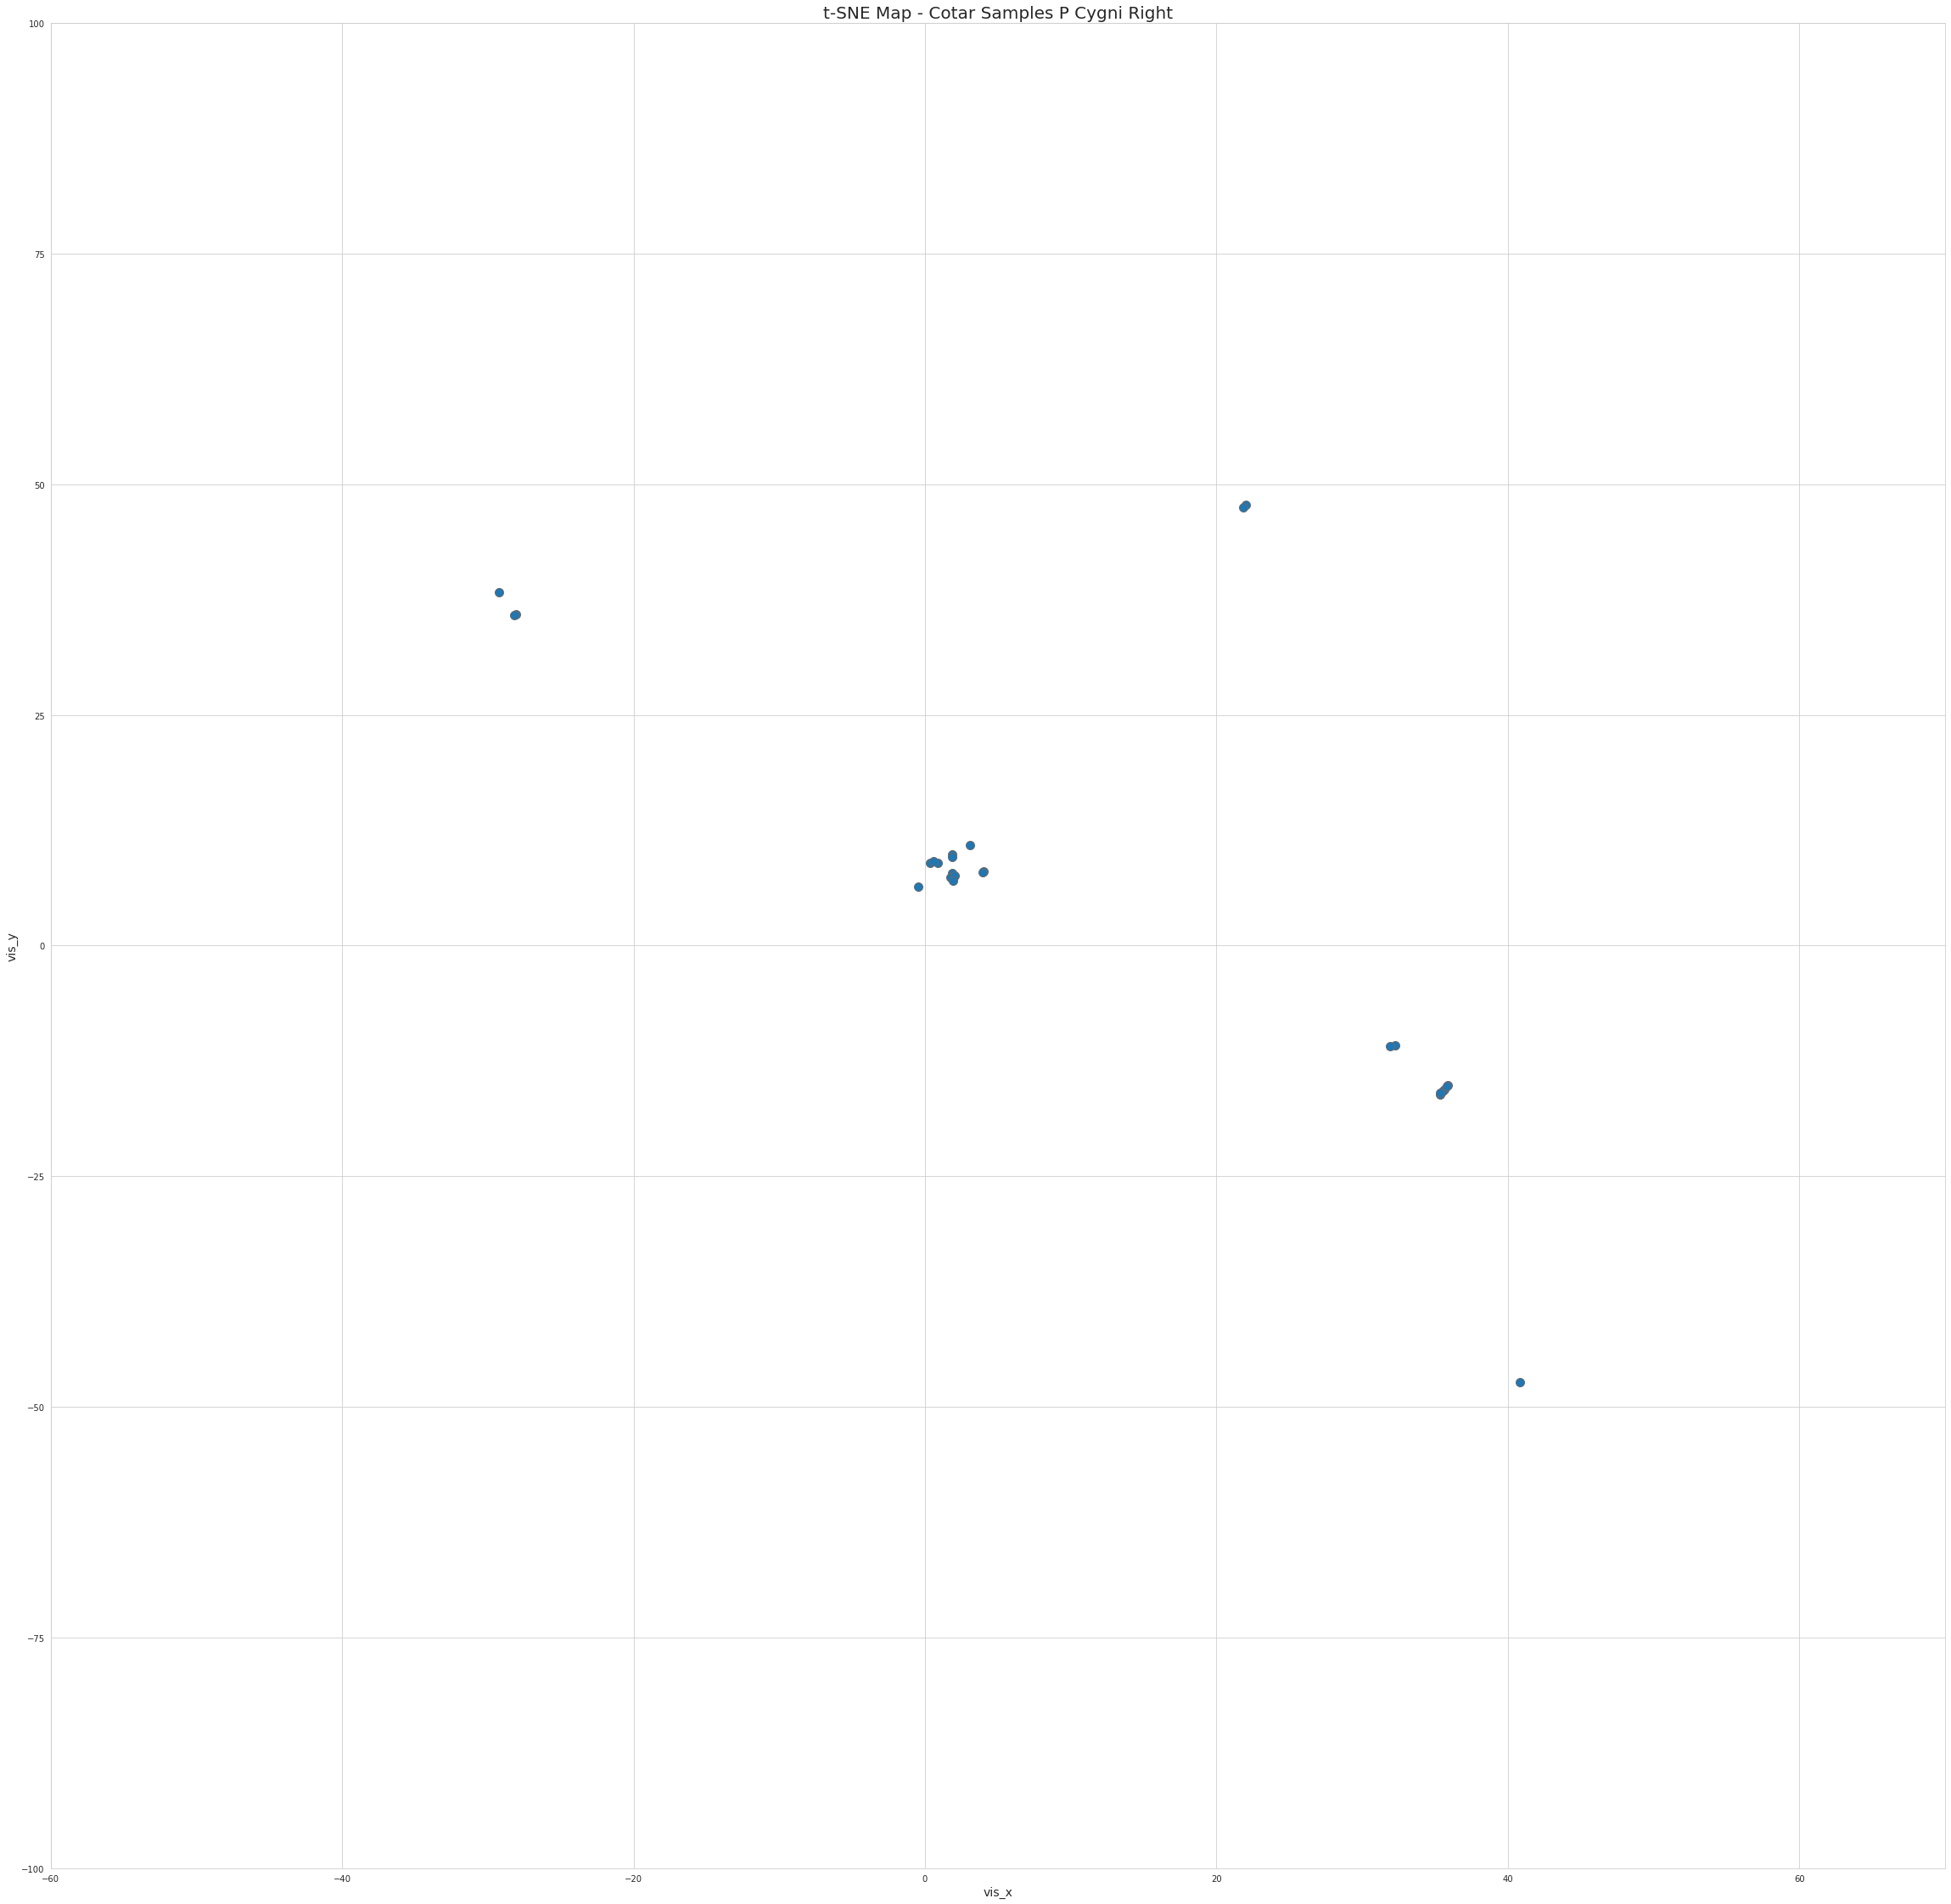

In [39]:
plt.figure(figsize=(40,40))
plt.scatter(df_pcygni_left["vis_x"],df_pcygni_left["vis_y"], edgecolors = 'dimgray', alpha = 1, s=100)
plt.title('t-SNE Map - Cotar Samples P Cygni Right',fontsize=20)
plt.xlabel('vis_x',fontsize=14)
plt.ylabel('vis_y',fontsize=14)
plt.xlim(-60, 70)
plt.ylim(-100, 100)
#plt.colorbar()
plt.show()

Plotting P Cygni Right of vis_x = 50

In [42]:
import h5py
GRID_SIZE = 0.06
LOWER_LAMBDA = 6472.5
UPPER_LAMBDA = 6740
PLOT_MASK = range(1475,1550)

In [43]:
hf_grid = h5py.File("/home/pravn/Dropbox/Masters/Research Data/wl_grid.h5", "r")
wl_grid = np.array(hf_grid["wl_grid"])

In [56]:
df_pcygni_right.head()

label       sobject_id      1475      1476      1477      1478      1479  \
97       8  140117002101365  0.794604  0.776347  0.776930  0.791981  0.790453   
127      8  140414005101276  0.840448  0.872358  0.844133  0.804374  0.792437   
130      8  140414005101301  0.892910  0.883916  0.898006  0.936324  0.947625   
362      8  140808001101021  0.955558  0.969204  0.991106  1.003321  0.995302   
413      8  141104005301237  0.833165  0.827541  0.839610  0.824984  0.809560   

         1480      1481      1482  ...      1542      1543      1544  \
97   0.794668  0.809689  0.775877  ...  0.853442  0.839655  0.833818   
127  0.768394  0.779685  0.807528  ...  0.844608  0.835611  0.826211   
130  0.969531  0.986549  0.974287  ...  1.054103  1.059027  1.045938   
362  0.990477  0.996383  0.998356  ...  0.986331  1.013787  1.035562   
413  0.809566  0.811731  0.821685  ...  0.866700  0.849979  0.841436   

         1545      1546      1547      1548      1549      vis_x      vis_y  
97   0.845164  0.823923  0.809429  0.824852  0.843350  62.037296   0.557338  
127  0.850751  0.865610  0.883266  0.889980  0.888322  57.102058   8.712856  
130  1.019266  0.981117  0.925452  0.881020  0.855598  61.135410  -2.716018  
362  1.023330  0.993065  0.986416  0.987714  0.952534  58.966576  11.378881  
413  0.863454  0.871877  0.862504  0.845633  0.839736  61.474506   6.420041  

[5 rows x 79 columns]

In [57]:
df_pcygni_right_spectra = df_pcygni_right.drop(['label','sobject_id','vis_x','vis_y'],axis=1)

In [58]:
df_pcygni_right_spectra.head()

1475      1476      1477      1478      1479      1480      1481  \
97   0.794604  0.776347  0.776930  0.791981  0.790453  0.794668  0.809689   
127  0.840448  0.872358  0.844133  0.804374  0.792437  0.768394  0.779685   
130  0.892910  0.883916  0.898006  0.936324  0.947625  0.969531  0.986549   
362  0.955558  0.969204  0.991106  1.003321  0.995302  0.990477  0.996383   
413  0.833165  0.827541  0.839610  0.824984  0.809560  0.809566  0.811731   

         1482      1483      1484  ...      1540      1541      1542  \
97   0.775877  0.798281  0.791803  ...  0.809798  0.836120  0.853442   
127  0.807528  0.819979  0.787258  ...  0.793973  0.824179  0.844608   
130  0.974287  0.926496  0.895544  ...  1.042551  1.069512  1.054103   
362  0.998356  0.996560  0.995002  ...  0.989721  0.979185  0.986331   
413  0.821685  0.832250  0.820291  ...  0.881949  0.877834  0.866700   

         1543      1544      1545      1546      1547      1548      1549  
97   0.839655  0.833818  0.845164  0.823923  0.809429  0.824852  0.843350  
127  0.835611  0.826211  0.850751  0.865610  0.883266  0.889980  0.888322  
130  1.059027  1.045938  1.019266  0.981117  0.925452  0.881020  0.855598  
362  1.013787  1.035562  1.023330  0.993065  0.986416  0.987714  0.952534  
413  0.849979  0.841436  0.863454  0.871877  0.862504  0.845633  0.839736  

[5 rows x 75 columns]

In [59]:
old_names = df_pcygni_right_spectra.columns.tolist()

In [60]:
new_names = wl_grid[PLOT_MASK].tolist()

In [61]:
col_rename_dict = {i:j for i,j in zip(old_names, new_names)}

In [62]:
df_pcygni_right_spectra.rename(columns=col_rename_dict, inplace=True)

In [63]:
df_pcygni_right_spectra.head()

6561.00   6561.06   6561.12   6561.18   6561.24   6561.30   6561.36  \
97   0.794604  0.776347  0.776930  0.791981  0.790453  0.794668  0.809689   
127  0.840448  0.872358  0.844133  0.804374  0.792437  0.768394  0.779685   
130  0.892910  0.883916  0.898006  0.936324  0.947625  0.969531  0.986549   
362  0.955558  0.969204  0.991106  1.003321  0.995302  0.990477  0.996383   
413  0.833165  0.827541  0.839610  0.824984  0.809560  0.809566  0.811731   

      6561.42   6561.48   6561.54  ...   6564.90   6564.96   6565.02  \
97   0.775877  0.798281  0.791803  ...  0.809798  0.836120  0.853442   
127  0.807528  0.819979  0.787258  ...  0.793973  0.824179  0.844608   
130  0.974287  0.926496  0.895544  ...  1.042551  1.069512  1.054103   
362  0.998356  0.996560  0.995002  ...  0.989721  0.979185  0.986331   
413  0.821685  0.832250  0.820291  ...  0.881949  0.877834  0.866700   

      6565.08   6565.14   6565.20   6565.26   6565.32   6565.38   6565.44  
97   0.839655  0.833818  0.845164  0.823923  0.809429  0.824852  0.843350  
127  0.835611  0.826211  0.850751  0.865610  0.883266  0.889980  0.888322  
130  1.059027  1.045938  1.019266  0.981117  0.925452  0.881020  0.855598  
362  1.013787  1.035562  1.023330  0.993065  0.986416  0.987714  0.952534  
413  0.849979  0.841436  0.863454  0.871877  0.862504  0.845633  0.839736  

[5 rows x 75 columns]

In [64]:
df_pcygni_right_spectra["label"]=df_pcygni_right["label"]
df_pcygni_right_spectra["sobject_id"]=df_pcygni_right["sobject_id"]

In [66]:
df_pcygni_right_spectra.head()

6561.00000000059  6561.060000000591  6561.120000000591  \
97           0.794604           0.776347           0.776930   
127          0.840448           0.872358           0.844133   
130          0.892910           0.883916           0.898006   
362          0.955558           0.969204           0.991106   
413          0.833165           0.827541           0.839610   

     6561.1800000005915  6561.240000000592  6561.300000000592  \
97             0.791981           0.790453           0.794668   
127            0.804374           0.792437           0.768394   
130            0.936324           0.947625           0.969531   
362            1.003321           0.995302           0.990477   
413            0.824984           0.809560           0.809566   

     6561.360000000593  6561.420000000593  6561.4800000005935  \
97            0.809689           0.775877            0.798281   
127           0.779685           0.807528            0.819979   
130           0.986549           0.974287            0.926496   
362           0.996383           0.998356            0.996560   
413           0.811731           0.821685            0.832250   

     6561.540000000594  ...  6565.020000000617  6565.0800000006175  \
97            0.791803  ...           0.853442            0.839655   
127           0.787258  ...           0.844608            0.835611   
130           0.895544  ...           1.054103            1.059027   
362           0.995002  ...           0.986331            1.013787   
413           0.820291  ...           0.866700            0.849979   

     6565.140000000618  6565.200000000618  6565.260000000619  \
97            0.833818           0.845164           0.823923   
127           0.826211           0.850751           0.865610   
130           1.045938           1.019266           0.981117   
362           1.035562           1.023330           0.993065   
413           0.841436           0.863454           0.871877   

     6565.320000000619  6565.3800000006195  6565.44000000062  label  \
97            0.809429            0.824852          0.843350      8   
127           0.883266            0.889980          0.888322      8   
130           0.925452            0.881020          0.855598      8   
362           0.986416            0.987714          0.952534      8   
413           0.862504            0.845633          0.839736      8   

          sobject_id  
97   140117002101365  
127  140414005101276  
130  140414005101301  
362  140808001101021  
413  141104005301237  

[5 rows x 77 columns]

Int64Index([  97,  127,  130,  362,  413,  422,  503,  506,  507,  777,  785,
             790,  838, 1078, 1254, 1258, 1260, 1262, 1265, 1273, 1378, 1383,
            1387, 1396, 1399, 1403, 1405, 1407, 1409, 1410, 1417, 1421, 1528,
            1547, 1742, 1761, 1973, 1985, 1989, 2014, 2044, 2121, 2122, 2125,
            2132, 2133, 2135, 2140, 2145, 2146, 2227, 2394, 2416, 3404, 3473,
            4212, 4310, 4318, 4365, 4394, 4444, 4457, 4462, 4509, 4529, 4546,
            4870, 5272, 5274, 5306, 5796, 6318, 6495, 6655],
           dtype='int64')


Text(6562.78, 2.5, 'Hα')

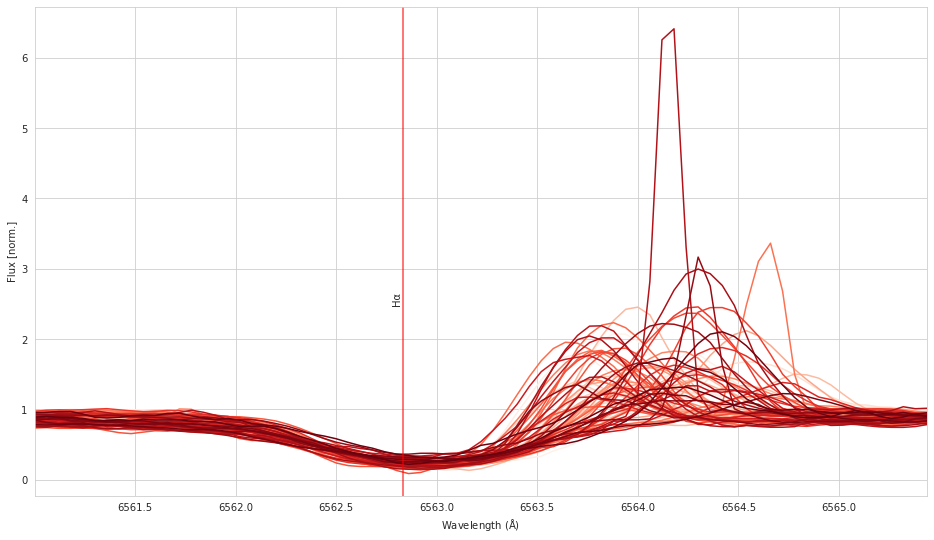

In [75]:
CLASS = 8
df_masked_label = df_pcygni_right_spectra.loc[df_pcygni_right_spectra["label"]==CLASS]
print(df_masked_label.index)
ax = (df_pcygni_right_spectra.loc[df_pcygni_right_spectra['label'] == CLASS].drop(columns=['label','sobject_id']).T).plot(
    legend=False, 
    xlabel = "Wavelength ($\mathrm{\AA}$)", 
    ylabel = "Flux [norm.]",
    #xticks = wl_grid[PLOT_MASK],
    xlim = (wl_grid[PLOT_MASK].min(),wl_grid[PLOT_MASK].max()),
    colormap = "Reds"
    )
halpha_line = ax.axvline(x=6562.83, color='red', label="coral", alpha=0.7)
ax.text(6562.78,2.5,"Hα", rotation=90)

Plotting P Cygni Left of vis_x = 50

In [90]:
df_pcygni_left_spectra = df_pcygni_left.drop(['label','sobject_id','vis_x','vis_y'],axis=1)

In [91]:
df_pcygni_left_spectra.head()

1475      1476      1477      1478      1479      1480      1481  \
98   0.902212  0.896195  0.883801  0.877552  0.870524  0.855226  0.868233   
448  0.786312  0.768837  0.775402  0.795894  0.790644  0.750955  0.716449   
451  1.006975  1.019525  1.016846  1.003143  0.992526  0.994551  0.997053   
501  0.903707  0.892364  0.881571  0.883749  0.898754  0.901635  0.880850   
739  0.893401  0.892024  0.963538  0.944604  0.919408  0.885470  0.898602   

         1482      1483      1484  ...      1540      1541      1542  \
98   0.851364  0.866953  0.878005  ...  1.449540  1.441761  1.450809   
448  0.723810  0.759621  0.785564  ...  0.780152  0.805479  0.814228   
451  0.973293  0.964791  0.974567  ...  1.715962  1.812407  1.890435   
501  0.864228  0.865285  0.877814  ...  0.896450  0.887888  0.901167   
739  0.899024  0.911703  0.909694  ...  1.905442  2.015293  2.065511   

         1543      1544      1545      1546      1547      1548      1549  
98   1.448255  1.384193  1.316939  1.259324  1.195910  1.128387  1.081750  
448  0.811243  0.809427  0.821999  0.839603  0.827900  0.811611  0.796575  
451  1.904455  1.807471  1.652943  1.489441  1.333781  1.196126  1.101844  
501  0.914989  0.921380  0.909083  0.890594  0.898631  0.906238  0.897890  
739  2.052755  1.978730  1.857915  1.663814  1.476995  1.342272  1.203494  

[5 rows x 75 columns]

In [92]:
df_pcygni_left_spectra.rename(columns=col_rename_dict, inplace=True)

In [93]:
df_pcygni_left_spectra.head()

6561.00   6561.06   6561.12   6561.18   6561.24   6561.30   6561.36  \
98   0.902212  0.896195  0.883801  0.877552  0.870524  0.855226  0.868233   
448  0.786312  0.768837  0.775402  0.795894  0.790644  0.750955  0.716449   
451  1.006975  1.019525  1.016846  1.003143  0.992526  0.994551  0.997053   
501  0.903707  0.892364  0.881571  0.883749  0.898754  0.901635  0.880850   
739  0.893401  0.892024  0.963538  0.944604  0.919408  0.885470  0.898602   

      6561.42   6561.48   6561.54  ...   6564.90   6564.96   6565.02  \
98   0.851364  0.866953  0.878005  ...  1.449540  1.441761  1.450809   
448  0.723810  0.759621  0.785564  ...  0.780152  0.805479  0.814228   
451  0.973293  0.964791  0.974567  ...  1.715962  1.812407  1.890435   
501  0.864228  0.865285  0.877814  ...  0.896450  0.887888  0.901167   
739  0.899024  0.911703  0.909694  ...  1.905442  2.015293  2.065511   

      6565.08   6565.14   6565.20   6565.26   6565.32   6565.38   6565.44  
98   1.448255  1.384193  1.316939  1.259324  1.195910  1.128387  1.081750  
448  0.811243  0.809427  0.821999  0.839603  0.827900  0.811611  0.796575  
451  1.904455  1.807471  1.652943  1.489441  1.333781  1.196126  1.101844  
501  0.914989  0.921380  0.909083  0.890594  0.898631  0.906238  0.897890  
739  2.052755  1.978730  1.857915  1.663814  1.476995  1.342272  1.203494  

[5 rows x 75 columns]

In [94]:
df_pcygni_left_spectra['max_location'] = df_pcygni_left_spectra.idxmax(axis=1)

In [95]:
df_pcygni_left_spectra["label"]=df_pcygni_left["label"]
df_pcygni_left_spectra["sobject_id"]=df_pcygni_left["sobject_id"]

In [96]:
df_pcygni_left_spectra.head()

6561.00000000059  6561.060000000591  6561.120000000591  \
98           0.902212           0.896195           0.883801   
448          0.786312           0.768837           0.775402   
451          1.006975           1.019525           1.016846   
501          0.903707           0.892364           0.881571   
739          0.893401           0.892024           0.963538   

     6561.1800000005915  6561.240000000592  6561.300000000592  \
98             0.877552           0.870524           0.855226   
448            0.795894           0.790644           0.750955   
451            1.003143           0.992526           0.994551   
501            0.883749           0.898754           0.901635   
739            0.944604           0.919408           0.885470   

     6561.360000000593  6561.420000000593  6561.4800000005935  \
98            0.868233           0.851364            0.866953   
448           0.716449           0.723810            0.759621   
451           0.997053           0.973293            0.964791   
501           0.880850           0.864228            0.865285   
739           0.898602           0.899024            0.911703   

     6561.540000000594  ...  6565.0800000006175  6565.140000000618  \
98            0.878005  ...            1.448255           1.384193   
448           0.785564  ...            0.811243           0.809427   
451           0.974567  ...            1.904455           1.807471   
501           0.877814  ...            0.914989           0.921380   
739           0.909694  ...            2.052755           1.978730   

     6565.200000000618  6565.260000000619  6565.320000000619  \
98            1.316939           1.259324           1.195910   
448           0.821999           0.839603           0.827900   
451           1.652943           1.489441           1.333781   
501           0.909083           0.890594           0.898631   
739           1.857915           1.663814           1.476995   

     6565.3800000006195  6565.44000000062  max_location  label  \
98             1.128387          1.081750       6565.02      8   
448            0.811611          0.796575       6563.28      8   
451            1.196126          1.101844       6565.08      8   
501            0.906238          0.897890       6563.52      8   
739            1.342272          1.203494       6565.02      8   

          sobject_id  
98   140117002101372  
448  140808001101382  
451  140808001101394  
501  140609002101090  
739  150606003901144  

[5 rows x 78 columns]

In [97]:
df_pcygni_left_spectra['max_location'] = pd.to_numeric(df_pcygni_left_spectra['max_location'], errors='ignore')

In [98]:
df_pcygni_left_spectra.head()

6561.00000000059  6561.060000000591  6561.120000000591  \
98           0.902212           0.896195           0.883801   
448          0.786312           0.768837           0.775402   
451          1.006975           1.019525           1.016846   
501          0.903707           0.892364           0.881571   
739          0.893401           0.892024           0.963538   

     6561.1800000005915  6561.240000000592  6561.300000000592  \
98             0.877552           0.870524           0.855226   
448            0.795894           0.790644           0.750955   
451            1.003143           0.992526           0.994551   
501            0.883749           0.898754           0.901635   
739            0.944604           0.919408           0.885470   

     6561.360000000593  6561.420000000593  6561.4800000005935  \
98            0.868233           0.851364            0.866953   
448           0.716449           0.723810            0.759621   
451           0.997053           0.973293            0.964791   
501           0.880850           0.864228            0.865285   
739           0.898602           0.899024            0.911703   

     6561.540000000594  ...  6565.0800000006175  6565.140000000618  \
98            0.878005  ...            1.448255           1.384193   
448           0.785564  ...            0.811243           0.809427   
451           0.974567  ...            1.904455           1.807471   
501           0.877814  ...            0.914989           0.921380   
739           0.909694  ...            2.052755           1.978730   

     6565.200000000618  6565.260000000619  6565.320000000619  \
98            1.316939           1.259324           1.195910   
448           0.821999           0.839603           0.827900   
451           1.652943           1.489441           1.333781   
501           0.909083           0.890594           0.898631   
739           1.857915           1.663814           1.476995   

     6565.3800000006195  6565.44000000062  max_location  label  \
98             1.128387          1.081750       6565.02      8   
448            0.811611          0.796575       6563.28      8   
451            1.196126          1.101844       6565.08      8   
501            0.906238          0.897890       6563.52      8   
739            1.342272          1.203494       6565.02      8   

          sobject_id  
98   140117002101372  
448  140808001101382  
451  140808001101394  
501  140609002101090  
739  150606003901144  

[5 rows x 78 columns]

Int64Index([  98,  448,  451,  501,  739,  773,  834, 1170, 1316, 1393, 1422,
            1530, 1986, 2139, 2142, 2410, 4222, 4316, 4406, 4420, 4424, 4500,
            4984, 5256, 5278, 5556, 6314, 6603],
           dtype='int64')


Text(6562.78, 2.5, 'Hα')

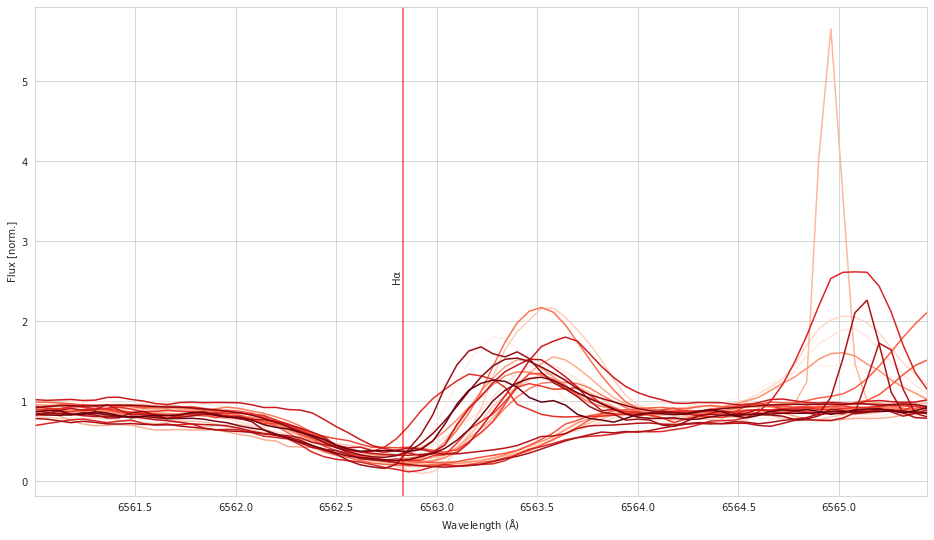

In [99]:
CLASS = 8
df_masked_label = df_pcygni_left_spectra.loc[df_pcygni_left_spectra["label"]==CLASS]
print(df_masked_label.index)
ax = (df_pcygni_left_spectra.loc[df_pcygni_left_spectra['label'] == CLASS].drop(columns=['label','sobject_id','max_location']).T).plot(
    legend=False, 
    xlabel = "Wavelength ($\mathrm{\AA}$)", 
    ylabel = "Flux [norm.]",
    #xticks = wl_grid[PLOT_MASK],
    xlim = (wl_grid[PLOT_MASK].min(),wl_grid[PLOT_MASK].max()),
    colormap = "Reds"
    )
halpha_line = ax.axvline(x=6562.83, color='red', label="coral", alpha=0.7)
ax.text(6562.78,2.5,"Hα", rotation=90)

In [100]:
df_pcygni_left_spectra_late_max = df_pcygni_left_spectra[df_pcygni_left_spectra['max_location']>6564.5]

In [101]:
df_pcygni_left_spectra_late_max.head()

6561.00000000059  6561.060000000591  6561.120000000591  \
98            0.902212           0.896195           0.883801   
451           1.006975           1.019525           1.016846   
739           0.893401           0.892024           0.963538   
1170          0.884998           0.880910           0.892661   
1422          0.957287           0.951207           0.946484   

      6561.1800000005915  6561.240000000592  6561.300000000592  \
98              0.877552           0.870524           0.855226   
451             1.003143           0.992526           0.994551   
739             0.944604           0.919408           0.885470   
1170            0.898495           0.883634           0.888489   
1422            0.945965           0.943958           0.952095   

      6561.360000000593  6561.420000000593  6561.4800000005935  \
98             0.868233           0.851364            0.866953   
451            0.997053           0.973293            0.964791   
739            0.898602           0.899024            0.911703   
1170           0.899812           0.908710            0.913295   
1422           0.956524           0.940482            0.947164   

      6561.540000000594  ...  6565.0800000006175  6565.140000000618  \
98             0.878005  ...            1.448255           1.384193   
451            0.974567  ...            1.904455           1.807471   
739            0.909694  ...            2.052755           1.978730   
1170           0.904703  ...            1.469416           1.006517   
1422           0.944231  ...            1.566639           1.466104   

      6565.200000000618  6565.260000000619  6565.320000000619  \
98             1.316939           1.259324           1.195910   
451            1.652943           1.489441           1.333781   
739            1.857915           1.663814           1.476995   
1170           0.977156           0.972651           0.971977   
1422           1.384111           1.266661           1.172202   

      6565.3800000006195  6565.44000000062  max_location  label  \
98              1.128387          1.081750       6565.02      8   
451             1.196126          1.101844       6565.08      8   
739             1.342272          1.203494       6565.02      8   
1170            0.976496          0.972723       6564.96      8   
1422            1.101994          1.024527       6565.02      8   

           sobject_id  
98    140117002101372  
451   140808001101394  
739   150606003901144  
1170  160811003401399  
1422  150428002601174  

[5 rows x 78 columns]

Int64Index([98, 451, 739, 1170, 1422, 2142, 2410, 4420, 4984, 5256], dtype='int64')


Text(6562.78, 2.5, 'Hα')

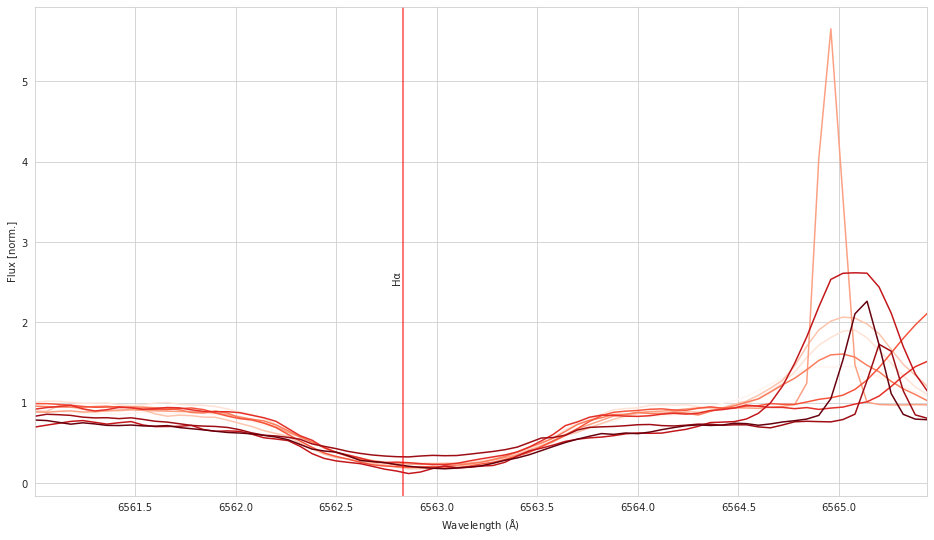

In [102]:
CLASS = 8
df_masked_label = df_pcygni_left_spectra_late_max.loc[df_pcygni_left_spectra_late_max["label"]==CLASS]
print(df_masked_label.index)
ax = (df_pcygni_left_spectra_late_max.loc[df_pcygni_left_spectra_late_max['label'] == CLASS].drop(columns=['label','sobject_id','max_location']).T).plot(
    legend=False, 
    xlabel = "Wavelength ($\mathrm{\AA}$)", 
    ylabel = "Flux [norm.]",
    #xticks = wl_grid[PLOT_MASK],
    xlim = (wl_grid[PLOT_MASK].min(),wl_grid[PLOT_MASK].max()),
    colormap = "Reds"
    )
halpha_line = ax.axvline(x=6562.83, color='red', label="coral", alpha=0.7)
ax.text(6562.78,2.5,"Hα", rotation=90)

In [103]:
df_pcygni_left_spectra_early_max = df_pcygni_left_spectra[df_pcygni_left_spectra['max_location']<6564.5]

Int64Index([ 448,  501,  773,  834, 1316, 1393, 1530, 1986, 2139, 4222, 4316,
            4406, 4424, 4500, 5278, 5556, 6314, 6603],
           dtype='int64')


Text(6562.78, 2.5, 'Hα')

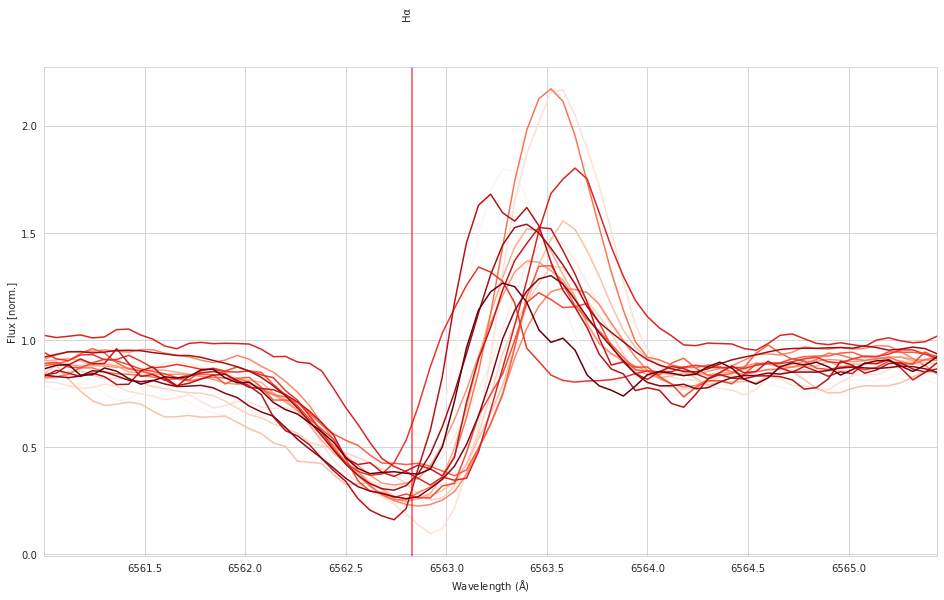

In [104]:
CLASS = 8
df_masked_label = df_pcygni_left_spectra_early_max.loc[df_pcygni_left_spectra_early_max["label"]==CLASS]
print(df_masked_label.index)
ax = (df_pcygni_left_spectra_early_max.loc[df_pcygni_left_spectra_early_max['label'] == CLASS].drop(columns=['label','sobject_id','max_location']).T).plot(
    legend=False, 
    xlabel = "Wavelength ($\mathrm{\AA}$)", 
    ylabel = "Flux [norm.]",
    #xticks = wl_grid[PLOT_MASK],
    xlim = (wl_grid[PLOT_MASK].min(),wl_grid[PLOT_MASK].max()),
    colormap = "Reds"
    )
halpha_line = ax.axvline(x=6562.83, color='red', label="coral", alpha=0.7)
ax.text(6562.78,2.5,"Hα", rotation=90)